In [ ]:
# default_exp n01

# Getting started with Pytorch

> Defining and training a Pytorch model for linear regression and visualizing the results dynamically.

**What you will learn:**
* How to Create a PyTorch Model
* How to Train Your Model
* How the Learning Rate Affects the Training
* Visualize the Training Prgress Dynamically

**Note:** The full description of the code and steps is available on Medium []. 

In [ ]:
# export
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from fastai.vision import Module
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

## 1. Linear Regression in PyTorch

In [ ]:
# export
# Defining the model
class LinearRegression(Module):
    def __init__(self, number_of_inputs, number_of_outputs):
        self.linear = nn.Linear(number_of_inputs, number_of_outputs)
        
    def forward(self, x):
        return self.linear(x) 

In [ ]:
# export
# Defining the fit function
def fit(inputs, targets, model, criterion, optimizer, num_epochs):
    loss_history = [] # to save the loss at each epoch.
    
    for epoch in range(num_epochs):
        # forward pass
        out = model(inputs)          
        loss = criterion(out, targets) 

        # backward pass
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
        # store value of loss
        loss_history.append(loss.item())
        
    print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1, num_epochs, loss.item()))
    return loss_history

In [ ]:
# Model, Criterion and Optimizer
model = LinearRegression(1,1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1) 

In [ ]:
# Create data
x_train = torch.linspace(0, 1, 10000) 
y_train = 2*x_train + 1 + torch.randn(x_train.size())*x_train*0.1 
x_train = x_train.unsqueeze(-1)
y_train = y_train.unsqueeze(-1)

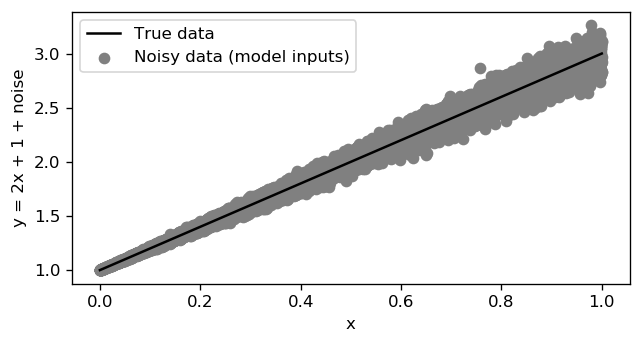

torch.Size([10000, 1]) torch.Size([10000, 1])


In [ ]:
# Visualize our data
plt.figure(figsize=(6,3), dpi=120)
plt.scatter(x_train.numpy(), y_train.numpy(), color='gray', label='Noisy data (model inputs)') 
plt.plot(x_train.numpy(), (2*x_train + 1).numpy(), color='black', label='True data')
plt.xlabel('x')
plt.ylabel('y = 2x + 1 + noise')
plt.legend()
plt.show();
print(x_train.size(), y_train.size()) 

In [ ]:
%time # Measure the time of execussion
loss = fit(x_train.requires_grad_(True), 
           y_train, 
           model, 
           criterion, 
           optimizer, 
           num_epochs=100)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs
Epoch[100/100], loss:0.003470


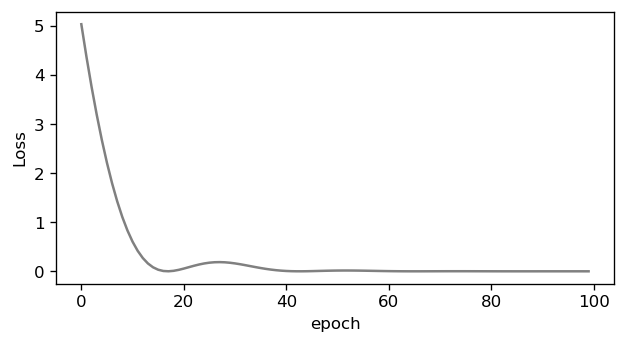

In [ ]:
plt.figure(figsize=(6,3), dpi=120)
plt.plot(loss, color='gray')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[1.9710]], requires_grad=True), Parameter containing:
 tensor([1.0078], requires_grad=True)]

In [ ]:
# Compute model estimates
model.eval()        # set model to evaluation mode
ye = model(x_train) # compute the y estimate

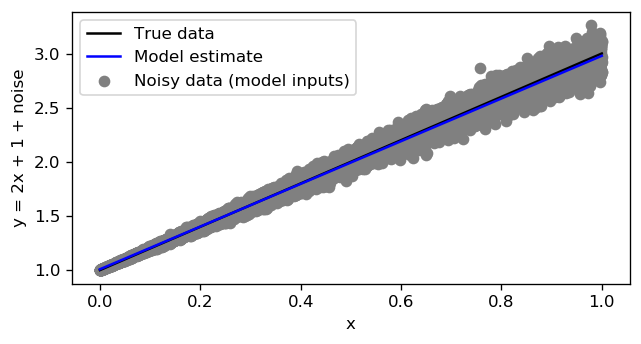

In [ ]:
# Visualize our data
plt.figure(figsize=(6,3), dpi=120)
plt.scatter(x_train.detach().numpy(), y_train.numpy(), color='gray', label='Noisy data (model inputs)') 
plt.plot(x_train.detach().numpy(), (2*x_train + 1).detach().numpy(), color='black', label='True data')
plt.plot(x_train.detach().numpy(), ye.detach().numpy(), color='blue', label='Model estimate')
plt.xlabel('x')
plt.ylabel('y = 2x + 1 + noise')
plt.legend()
plt.show();

## 2. Stepping Up to Polynomial Regression

In [ ]:
x_true = torch.linspace(-2, 2, 1000)
y_true = 3*x_true**2 + 2*x_true + 1
y_train =  y_true + torch.randn(x_true.size())

x_true.unsqueeze_(-1)
y_train.unsqueeze_(-1)

x_train = torch.cat((x_true**2, x_true), dim=1) # Concatenate x and x**2 to a N x 2 x_train matrix.
print(x_train.size(), y_train.size()) 

torch.Size([1000, 2]) torch.Size([1000, 1])


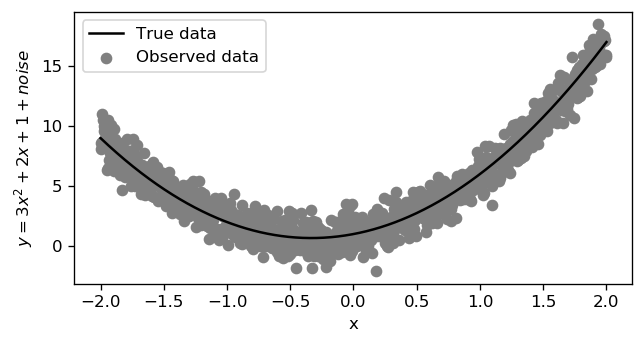

In [ ]:
# Visualize our data
plt.figure(figsize=(6,3), dpi=120)
plt.scatter(x_true.numpy(), y_train.numpy(), color='gray', label='Observed data') 
plt.plot(x_true.numpy(), y_true.numpy(), color='black', label='True data')
plt.xlabel('x')
plt.ylabel(r'$y = 3x^2 + 2x + 1 + noise$') # Notice you can use latex in the label string
plt.legend()
plt.show();

In [ ]:
model = LinearRegression(2, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1) 

In [ ]:
%time 
loss = fit(x_train, y_train, model, criterion, optimizer, num_epochs=250)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Epoch[250/250], loss:1.013575


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[3.0044, 1.9490]], requires_grad=True), Parameter containing:
 tensor([0.9764], requires_grad=True)]

In [ ]:
model.eval()
ye = model(x_train) # compute the y estimate
ye = ye.detach().numpy() # get the values from the variable, them pass them to the cpu and convert to a numpy array

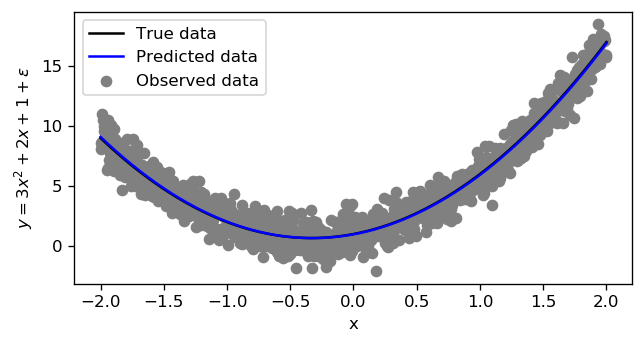

In [ ]:
# Visualize our data
plt.figure(figsize=(6,3), dpi=120)
plt.scatter(x_true.numpy(), y_train.numpy(), color='gray', label='Observed data') 
plt.plot(x_true.numpy(), y_true.numpy(), color='black', label='True data')
plt.plot(x_true.numpy(), ye, color='blue', label='Predicted data')
plt.xlabel('x')
plt.ylabel(r'$y = 3x^2 + 2x + 1 + \epsilon$') # Notice you can use latex in the label string
plt.legend()
plt.show();

In [ ]:
# export
def fit2(inputs, targets, model, criterion, optimizer, num_epochs):
    loss_history = [] # to save the loss at each epoch.
    out_history = [] # to save the parameters at each epoch
    for ii, epoch in enumerate(range(num_epochs)):
        # forward
        out = model(inputs)
        loss = criterion(out, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.item())
        
        if ii == 0:
            out_history = out.detach().numpy()
        else:
            out_history = np.concatenate((out_history, out.detach().numpy()), axis=-1)
        
    print('Epoch[{}/{}], loss:{:.6f}'.format(epoch+1, num_epochs, loss.item()))
    return loss_history, out_history

In [ ]:
model = LinearRegression(2, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1) 

In [ ]:
%time 
loss, out = fit2(x_train, y_train, model, criterion, optimizer, num_epochs=250)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Epoch[250/250], loss:1.013575


The **out** variable stored the output for every epoch. Now it's time to plot and animate.

Starting a cell with **%%caputre** prevents it from displaying the output, this will be useful in the next cell so we can suppress the plot from displaying since we will show the animation in the cell that follows.

In [ ]:
%%capture
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(6,3), dpi=120)
ax.set_xlim((-2.2, 2.2))
ax.set_ylim((-5, 20))
ax.plot(x_true.numpy(), y_true.numpy(), lw=2, color='black', label='True model')
ax.scatter(x_true.numpy(), y_train.numpy(), color='gray', label='Observed data') 
ax.set_ylabel(r'$y = 3x^2 + 2x + 1 + noise$') # Notice you can use latex in the label string
line, = ax.plot([], [], lw=2, label='Predicted model')
ax.legend()

# animation function. This is called sequentially
def animate(i):
    line.set_data(x_true.numpy(), out[...,i])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=out.shape[1], interval=30, blit=True)

Now we show the animation.

In [ ]:
HTML(anim.to_html5_video())

## 3. General Non-Linear Model

In [ ]:
x_train = torch.linspace(-2, 2, 1000)
x_train.unsqueeze_(-1)
y_true = 6*x_train**3 + 3*x_train**2 + 2*x_train + 1
y_train =  y_true + torch.randn(x_train.size())*5

print(x_train.size(), y_train.size()) 

torch.Size([1000, 1]) torch.Size([1000, 1])


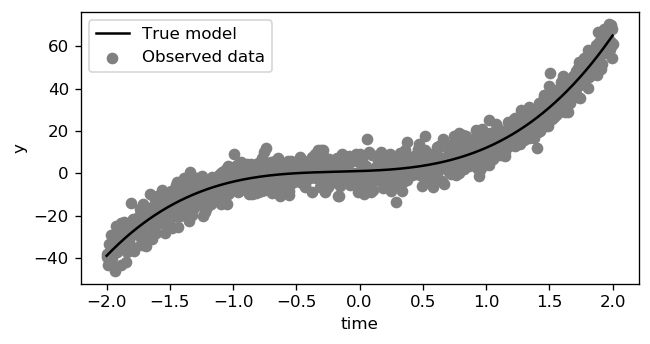

In [ ]:
# Visualize our data
plt.figure(figsize=(6,3), dpi=120)
plt.scatter(x_train.numpy(), y_train.numpy(), color='gray', label='Observed data') 
plt.plot(x_train.numpy(), y_true.numpy(), color='black', label='True model')
plt.xlabel('time')
plt.ylabel('y') # Notice you can use latex in the label string
plt.legend()
plt.show();

In [ ]:
# export
class GeneralFit(Module):
    def __init__(self, input_size, output_size, hidden_size=100):
        self.linear_in  = nn.Linear(input_size, hidden_size)
        self.hidden     = nn.Linear(hidden_size, hidden_size)
        self.linear_out = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = torch.relu(self.linear_in(x))
        x = torch.relu(self.hidden(x))
        x = self.linear_out(x)
        return x

In [ ]:
model = GeneralFit(1, 1)
criterion = nn.MSELoss() # Tentar também L1loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
%time 
loss, out = fit2(x_train.requires_grad_(True),
                y_train, 
                model, 
                criterion, 
                optimizer, 
                num_epochs=200)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Epoch[200/200], loss:26.039164


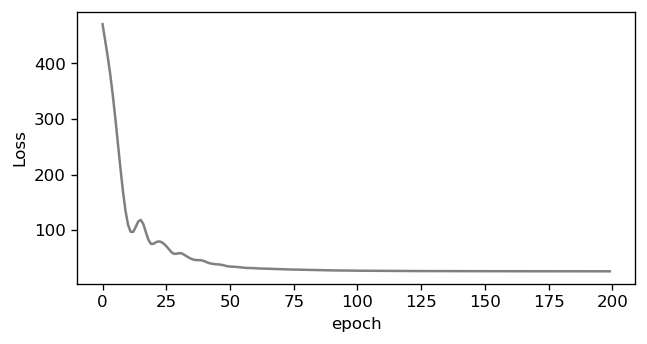

In [ ]:
plt.figure(figsize=(6,3), dpi=120)
plt.plot(loss, color='gray')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
ye = model(x_train) # compute the y estimate
ye = ye.detach().numpy() # get the values from the variable, them pass them to the cpu and convert to a numpy array

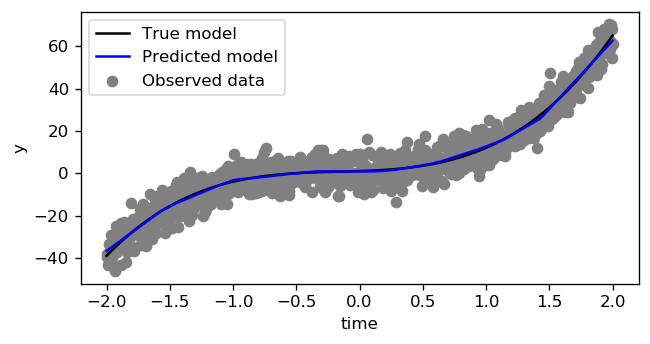

In [ ]:
# Visualize our data
plt.figure(figsize=(6,3), dpi=120)
plt.scatter(x_train.detach().numpy(), y_train.numpy(), color='gray', label='Observed data') 
plt.plot(x_train.detach().numpy(), y_true.numpy(), color='black', label='True model')
plt.plot(x_train.detach().numpy(), ye, color='blue', label='Predicted model')
plt.xlabel('time')
plt.ylabel('y')
plt.legend()
plt.show();

In [ ]:
%%capture
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(6,3), dpi=120)
#ax.set_xlim((-2.2, 2.2))
#ax.set_ylim((-5, 20))
ax.plot(x_train.detach().numpy(), y_true.numpy(), lw=2, color='black', label='True model')
ax.scatter(x_train.detach().numpy(), y_train.numpy(), color='gray', label='Observed data') 
ax.set_ylabel('y') # Notice you can use latex in the label string
line, = ax.plot([], [], lw=2, label='Predicted model')
ax.legend()

# animation function. This is called sequentially
def animate(i):
    line.set_data(x_train.detach().numpy(), out[...,i])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=out.shape[1], interval=30, blit=True)

In [ ]:
HTML(anim.to_html5_video())